In [54]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

## Intro

In this assignment we will be making 3 machine learning models. Using the data called diamond found on kaggle. The data describes the charactersitics of diamonds, its dimensions and quality. We will be making 2 linear regression models to predict the price of a given diamond, and 1 classification model to predict the cut quality.



In [3]:

data = pd.read_csv(r"C:\Users\KRP\Programming\School\AiCphBusiness\MachineLearning\Assignment2\diamonds.csv")
data = data.drop(["Unnamed: 0"], axis=1)
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [48]:
def differencePlot(y_test, y_predict, c1, c2):
    fig, ax = plt.subplots(figsize=(10,6))
    ax.set(xlabel = 'Predicted Price', ylabel = 'Actual Price - Predicted Price', title = 'Between what is desired and what is present')
    ax.scatter(y_predict, y_test - y_predict, alpha = 0.15, color = c1)
    ax.axhline(y = 0, color = c2)

In [35]:
def linearPlot(y_test, y_predict, c1, c2):
    fig, ax = plt.subplots(figsize=(10,6))
    ax.set(ylabel = 'Predicted Price', xlabel = "Actual Price ", title = 'Between what is desired and what is present')
    ax.scatter(y_test, y_predict, alpha = 0.15, color = c1)
   

## Preprocessing 

In this section we will do some simple preprocessing. Usually one hot encoding is needed to transform classes into feature. In this case we have decided to replace the cases with a number value, this makes sense because the classes are ranked.

In [5]:
data['volume']=data['x']*data['y']*data['z']
data=data.drop(['x','y','z'],axis=1)

new_cut = {'Fair':1,'Good':2,'Very Good':3, 'Premium':4,'Ideal':5}
data['cut'] = data['cut'].map(new_cut)

new_color = {'J':1,'I':2, 'H':3,'G':4,'F':5,'E':6,'D':7}
data['color'] = data['color'].map(new_color)

new_clarity = {'I1':1,'SI2':2,'SI1':3,'VS2':4,'VS1':5,'VVS2':6,'VVS1':7,'IF':8}
data['clarity'] = data['clarity'].map(new_clarity)

data.head()

,carat,cut,color,clarity,depth,table,price,volume
0,0.23,5,6,2,61.5,55.0,326,38.202030
1,0.21,4,6,3,59.8,61.0,326,34.505856
2,0.23,2,6,5,56.9,65.0,327,38.076885
3,0.29,4,2,4,62.4,58.0,334,46.724580
4,0.31,2,1,2,63.3,58.0,335,51.917250


<Axes: >

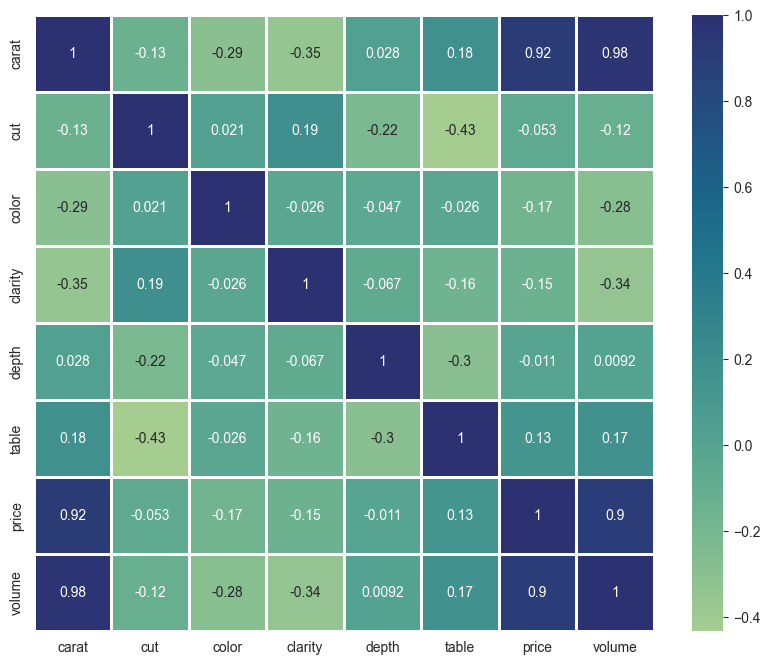

In [8]:
correlation= data.corr()
f, ax = plt.subplots(figsize=(10,8))
sns.heatmap(correlation,cmap="crest",annot=True,linewidths=2)

In [26]:
x = data.drop(["price"], axis=1)
y = data["price"]


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

scaler=StandardScaler()

x_train_s=x_train.copy()
x_train_s[['carat','table','volume','cut','depth']]=scaler.fit_transform(x_train_s[['carat','table','volume','cut','depth']])

x_train=x_train_s

x_test_s=x_test.copy()
x_test_s[['carat','table','volume','cut','depth']]=scaler.transform(x_test_s[['carat','table','volume','cut','depth']])

x_test=x_test_s


### Overfitting

To Test the for over fitting, we can use cross validation. Overfitting is when the model is trained too well on the training dataset that it is not able predict datapoints outside of the training set. Cross validation includes resampling the training data set and splitting it into different portions. The model is then trained on the training set several times, excluding the validation sets. The model is then tested on the different cross validation sets to see if it statistically performs differently. 


# Linear Regression

In [28]:
lm = LinearRegression()
# Perform 5-fold cross-validation
cv_scores = cross_val_score(lm, x_train, y_train, cv=5,scoring= "r2")
# Print cross-validation scores
print(f"CV Scores: {cv_scores}")
# Average CV score
print(f"Average CV Score: {np.mean(cv_scores)}")

CV Scores: [0.90657521 0.90490455 0.90605446 0.90173358 0.89759462]
Average CV Score: 0.9033724829789811


In [30]:
lm.fit(x_train, y_train)
y_pred = lm.predict(x_test)

print(y_pred)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False) 
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")

[ 3197.31229123  5091.88278566 11028.92707852 ...  4866.62695068
  1261.85780705  5056.46257941]
MAE: 847.0889743328679
MSE: 1517633.3296424553
RMSE: 1231.9226151193327
R-squared: 0.905545981764397


C:\Users\KRP\Programming\School\AiCphBusiness\.venv\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


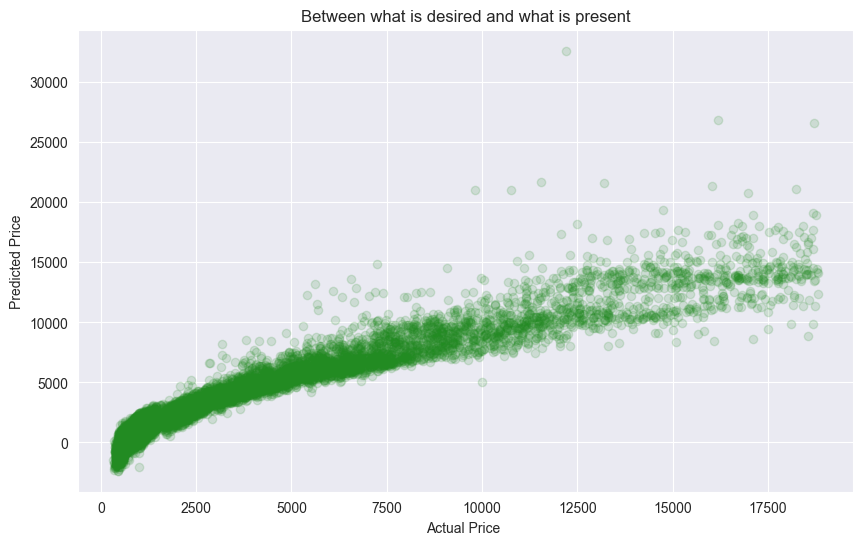

In [36]:
linearPlot(y_test, y_pred, 'forestgreen', 'darkgreen')


MAE tells you, on average, how much the predictions deviate from the actual values. An MAE of 734.24 suggests that, on average, the model's predictions are about 734 units away from the actual values. The interpretation of this number depends on the context of your problem and the scale of the target variable.

MSE is the average of the squares of the errors. It's more sensitive to outliers than MAE because it squares the differences. Your MSE value is relatively large because it's influenced by the scale of your data and the squared differences.

RMSE, which is the square root of MSE, is often more interpretable than MSE because it's in the same units as your target variable. An RMSE of 1,115.69 indicates the standard deviation of the prediction errors. Like the MAE, whether this is considered high or low depends on the scale of your target variable and the context of your problem.

R-squared value of 0.92 is quite high, indicating that your model explains 92% of the variance in the target variable based on its inputs. This suggests that the model fits the data well and is capable of capturing most of the variability in the target variable with its predictions.

The plot shows the Predicted price vs the actual price. While there appears to be a okay strong linear reggression, the model performs badly in the extremes. This is obvious in the low end where it has predicted many of the diamonds to be negative cost. 

Overall the mse and mae are high and the model does not perfom up to standard.

# Random Forest

In this section we will attempt to use random forest model to see if we can get a better performing model.

In [44]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
rf_pre = rf.predict(x_test)

print('Random Forest Regressor accuracy: ')
crossr = cross_val_score(estimator = rf, X = x_train, y = y_train, cv = 4,verbose = 0)
mser = mean_squared_error(y_test, rf_pre)
rmser = mean_squared_error(y_test, rf_pre)**0.5
maer = mean_absolute_error(y_test, rf_pre)
r2r = r2_score(y_test, rf_pre)

print('Cross val     : ', crossr)
print('R2            : ', r2r)
print('MAE           : ', maer)
print('MSE (RMSE)    : ', mser,' (',rmser,')')

Random Forest Regressor accuracy: 
Cross val     :  [0.98094322 0.9803593  0.97910489 0.97990576]
R2            :  0.9819647462883293
MAE           :  274.75915051278855
MSE (RMSE)    :  289780.1771981379  ( 538.3123416736216 )


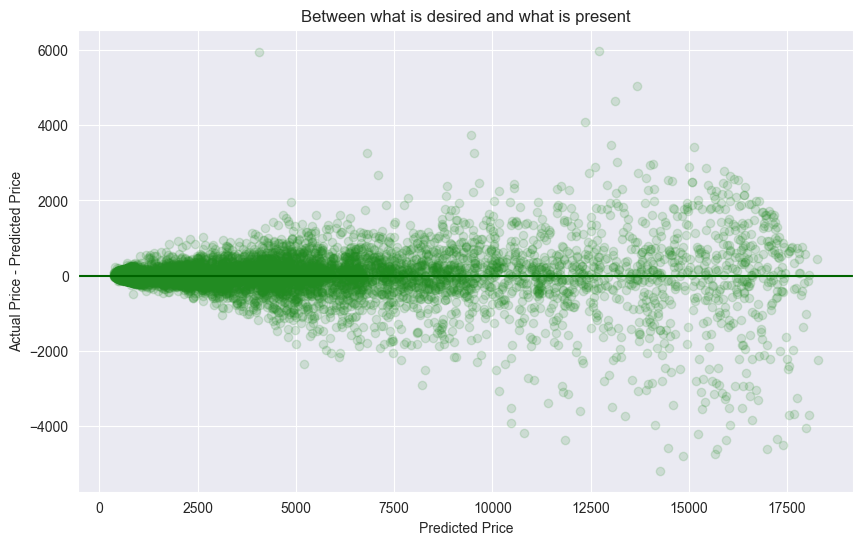

In [49]:
differencePlot(y_test, rf_pre, 'forestgreen', 'darkgreen')


# Knn (classification)

In this section we will attempt to make a model to predict the cut. We understand that the business case for this makes little sense, however 

In [52]:
data = pd.read_csv(r"C:\Users\KRP\Programming\School\AiCphBusiness\MachineLearning\Assignment2\diamonds.csv")
data = data.drop(["Unnamed: 0"], axis=1)
data.head()


data['volume']=data['x']*data['y']*data['z']
data=data.drop(['x','y','z'],axis=1)

new_color = {'J':1,'I':2, 'H':3,'G':4,'F':5,'E':6,'D':7}
data['color'] = data['color'].map(new_color)

new_clarity = {'I1':1,'SI2':2,'SI1':3,'VS2':4,'VS1':5,'VVS2':6,'VVS1':7,'IF':8}
data['clarity'] = data['clarity'].map(new_clarity)

y = data.pop("cut")
x = data

In [51]:
# Split the data into training and test sets

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

,carat,cut,color,clarity,depth,table,price,volume
0,0.23,5,6,2,61.5,55.0,326,38.202030
1,0.21,4,6,3,59.8,61.0,326,34.505856
2,0.23,2,6,5,56.9,65.0,327,38.076885
3,0.29,4,2,4,62.4,58.0,334,46.724580
4,0.31,2,1,2,63.3,58.0,335,51.917250
...,...,...,...,...,...,...,...,...
53935,0.72,5,7,3,60.8,57.0,2757,115.920000
53936,0.72,2,7,3,63.1,55.0,2757,118.110175
53937,0.70,3,7,3,62.8,60.0,2757,114.449728
53938,0.86,4,3,2,61.0,58.0,2757,140.766120


## Hyperparameter Adjustment

In the development of the k-Nearest Neighbors (kNN) model, the primary hyperparameter that was adjusted is the number of neighbours, k. Adjusting k is vital because it fundamentally influences the model's prediction and its capability to generalize effectively to unseen data.

### Adjusting K

- Overfitting vs. Underfitting: Selecting a small k value can cause the model to overfit, interpreting noise in the training data within patterns. This results in excellent performance on the training data but poor performance on new, unseen data. Conversely, a large k might lead the model to underfit, simplifying the model too much and missing important patterns, which similarly degrades performance on new data.
- Balancing Bias and Variance: The aim of adjusting k is to find an optimal balance between bias , leading to a model that is neither too simple nor too complex but just right for making accurate predictions.

## Measuring Quality Using F1 Score

The F1 score is the mean of precision and recall, is a crucial metric for evaluating a model's performance, particularly in scenarios with imbalanced datasets. It provides a balanced measure of a model's efficiency by combining precision and recall into a single metric.

### Accuracy

Accuracy is a straightforward measure of performance and is calculated as the ratio of correct predictions to the total number of predictions.  In the context of imbalanced datasets, accuracy can be misleading, as it might not accurately reflect the model's effectiveness in predicting minority class instances.

### Precision

Precision assesses the accuracy of positive predictions, defined as the ratio of true positives (correct positive predictions) to the total number of positive predictions made (comprising both true positives and false positives). A high precision indicates a model's low rate of false positive predictions. In applications where false positives carry a significant cost this is vital.

### Recall (Sensitivity)

Recall or the sensitivity, measures the model's ability to identify all relevant rows within a dataset, calculated as the ratio of true positives to the actual number of positive instances (true positives plus false negatives). A high recall signifies a low rate of false negatives, essential in situations where failing to detect a positive instance is highly detrimental.

### Why Use F1 Score

The F1 score is particularly advantageous when requiring a balance between precision and recall in the presence of an uneven class distribution (imbalanced classes). It ensures a model does not excel in one metric at the detriment of the other, promoting a more comprehensive and equitable evaluation of the model's quality.



To test for the ideal number of k-neighbours, we will train the model on 1-30 neightbours and using the metric above, determine the best model.

In [55]:
k_values = [i for i in range (1,31)]
performance = []

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_scaled, y_train)
    y_pred = knn.predict(x_test_scaled)
    val_score = cross_val_score(knn, x_train_scaled, y_train, cv=5)
    performance.append({
        'k': k,
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred, average='macro', zero_division=0),
        'recall': recall_score(y_test, y_pred, average='macro', zero_division=0),
        'cross_val_mean_accuracy': np.mean(val_score),
        'f1': f1_score(y_test, y_pred, average='macro', zero_division=0)
    })

    
df = pd.DataFrame(performance)
df.head(100) 

C:\Users\KRP\Programming\School\AiCphBusiness\.venv\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\KRP\Programming\School\AiCphBusiness\.venv\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\KRP\Programming\School\AiCphBusiness\.venv\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\KRP\Programming\School\AiCphBusiness\.venv\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\KRP\Programming\School\AiCphBusiness\.venv\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWar

,k,accuracy,precision,recall,cross_val_mean_accuracy,f1
0,1,0.032165,0.011530,0.012033,0.033139,0.010696
1,2,0.031053,0.008668,0.009568,0.031169,0.008056
2,3,0.024286,0.005985,0.006851,0.026696,0.005594
3,4,0.023545,0.005700,0.006860,0.025259,0.005404
4,5,0.022062,0.004631,0.006005,0.023869,0.004680
5,6,0.022062,0.004051,0.005522,0.024194,0.004276
6,7,0.023267,0.004239,0.006002,0.024495,0.004459
7,8,0.023915,0.004371,0.006263,0.024194,0.004738
8,9,0.024008,0.004457,0.006085,0.024564,0.004707
9,10,0.023730,0.004340,0.006264,0.025074,0.004672


We opt for a k value within the 10 to 20 range as it offers the most balanced performance across all evaluated metrics, effectively addressing the trade-offs inherent in model precision and recall while ensuring robust accuracy and generalization capabilities.

Justification: 
This decision is based on a comprehensive evaluation of the model's performance dynamics, prioritizing a balanced approach to precision and recall, especially given the challenges presented by imbalanced datasets. Our selected 

k range ensures the model is neither too sensitive to noise or overfitting nor too generalized or overfitted, optimizing its predictive capabilities across various scenarios.